In [56]:
import numpy as np
import torch

from datasets.rsna_breast_cancer import BreastCancerDataset, DatasetSplit
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
dataset_path = "../datasets/data/img/"  # Pfad zu den Bildern
meta_data_csv_path = "../datasets/data/train.csv"  # Pfad zur Meta-Daten CSV
dataset = BreastCancerDataset(img_dir=dataset_path, meta_data_csv_path=meta_data_csv_path)



In [58]:
def plot_samples(dataset, n=5):
    fig, axs = plt.subplots(1, n, figsize=(20, 4))
    for i in range(n):
        sample = dataset[i]
        image = sample["image"]

        if isinstance(image, torch.Tensor):
            image = image.numpy()

        if image.shape[0] == 1:
            image = image.squeeze(0)

        else:
            image = np.transpose(image, (1, 2, 0))

        axs[i].imshow(image, cmap="gray" if image.ndim == 2 else None)
        axs[i].set_title(f"Anomaly: {sample['is_anomaly']}")
        axs[i].axis("off")

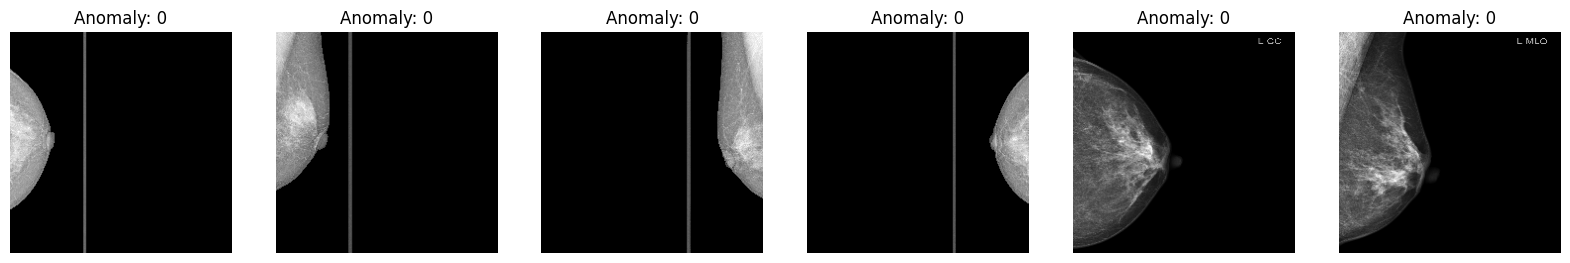

In [59]:
plot_samples(dataset, n=6)

In [60]:
from datasets.rsna_breast_cancer import BreastCancerDataset

_DATASETS = {
    "BreastCancerDataset": ["datasets.rsna_breast_cancer", "BreastCancerDataset"]
}
name = "BreastCancerDataset"
dataset_info = _DATASETS[name]
dataset_library = __import__(dataset_info[0], fromlist=[dataset_info[1]])
dataset_info[1]


'BreastCancerDataset'

In [61]:
train_dataset = BreastCancerDataset(img_dir=dataset_path, meta_data_csv_path=meta_data_csv_path,
                                    split=DatasetSplit.TRAIN)
test_dataset = BreastCancerDataset(img_dir=dataset_path, meta_data_csv_path=meta_data_csv_path, split=DatasetSplit.TEST)
val_dataset = BreastCancerDataset(img_dir=dataset_path, meta_data_csv_path=meta_data_csv_path, split=DatasetSplit.VAL)

In [62]:
print(f"Dataset: train={len(train_dataset)} test={len(test_dataset)} val={len(val_dataset)}")


Dataset: train=38294 test=5471 val=10941


In [63]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=1,
    prefetch_factor=2,
    pin_memory=True,
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=1,
    prefetch_factor=2,
    pin_memory=True,
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=1,
    prefetch_factor=2,
    pin_memory=True,
)

In [64]:
dataloaders = {
                "training": train_dataloader,
                "validation": val_dataloader,
                "testing": test_dataloader,
            }

In [65]:
imagesize = dataloaders["training"].dataset.imagesize


In [66]:
imagesize

224